In [1]:
%matplotlib inline

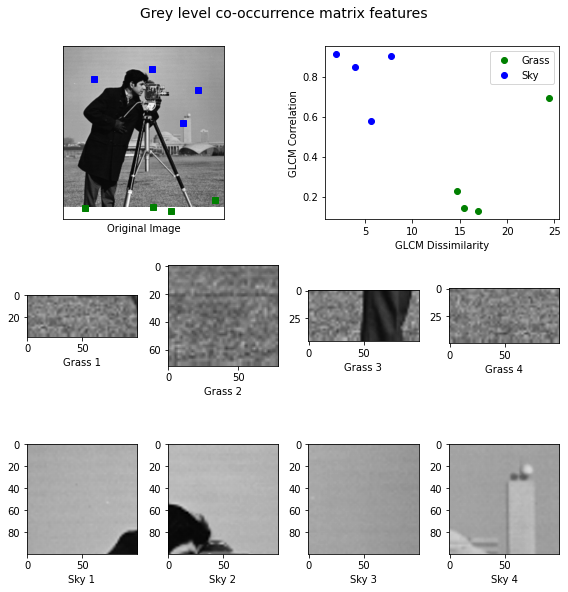

In [2]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data


PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(474, 291), (440, 433), (466, 18), (462, 236)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(54, 48), (21, 233), (90, 380), (195, 330)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

/home/mhoncharuk/Education/liver_disease_recognizer/pvl/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/home/mhoncharuk/Education/liver_disease_recognizer/pvl/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in ubyte_scalars


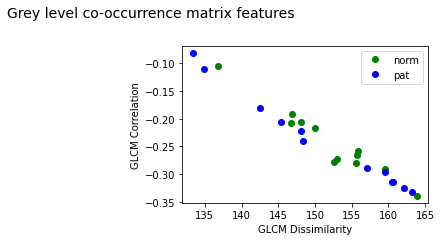

In [7]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data
import numpy as np
import pandas as pd
import cv2
import os
from os import path


def getNormArr_type1(a):
    normArr = []
    for i in range(a.shape[1]):
        newList = []
        for j in range(a.shape[0] - 1):
            newList.append(a[j + 1][i] - a[j][i])
        normArr.append(newList)
    minArr = abs(min(min(normArr)))
    for i in range(len(normArr)):
        for j in range(len(normArr[0])):
            normArr[i][j] += minArr
    return np.array(normArr)

folder_norma = "/home/mhoncharuk/Education/liver_disease_recognizer/dataset/top_norma/"
norm_patches = []
image_files = os.listdir(folder_norma)
for img_name in image_files:
    img = cv2.imread(folder_norma + img_name, cv2.IMREAD_GRAYSCALE)     # image matrix
    norm_patches.append(getNormArr_type1(img))


folder_pat = "/home/mhoncharuk/Education/liver_disease_recognizer/dataset/top_pat/"
pat_patches = []
image_files = os.listdir(folder_pat)
for img_name in image_files:
    img = cv2.imread(folder_pat + img_name, cv2.IMREAD_GRAYSCALE)     # image matrix
    pat_patches.append(getNormArr_type1(img))


# compute some GLCM properties each patch
xs = []
ys = []
for patch in (norm_patches + pat_patches):
    glcm = greycomatrix(patch, distances=[2], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

    
# create the figure
fig = plt.figure(figsize=(8, 8))

# # display original image with locations of patches
# ax = fig.add_subplot(3, 2, 1)
# ax.imshow(image, cmap=plt.cm.gray,
#           vmin=0, vmax=255)
# for (y, x) in grass_locations:
#     ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
# for (y, x) in sky_locations:
#     ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
# ax.set_xlabel('Original Image')
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(norm_patches)], ys[:len(norm_patches)], 'go',
        label='norm')
ax.plot(xs[len(norm_patches):], ys[len(norm_patches):], 'bo',
        label='pat')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# # display the image patches
# for i, patch in enumerate(grass_patches):
#     ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
#     ax.imshow(patch, cmap=plt.cm.gray,
#               vmin=0, vmax=255)
#     ax.set_xlabel('Grass %d' % (i + 1))

# for i, patch in enumerate(sky_patches):
#     ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
#     ax.imshow(patch, cmap=plt.cm.gray,
#               vmin=0, vmax=255)
#     ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


In [ ]:

# select some patches from sky areas of the image
sky_locations = [(54, 48), (21, 233), (90, 380), (195, 330)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [6]:
type(grass_patches[0])


numpy.ndarray

In [18]:
def getPixelMatrix(filename):
    arr = cv2.imread(filename, 0)
    return arr.astype(int)


def getNormArr(a):
    normArr = []
#     for i in range(a.shape[0]):
    for i in range(a.shape[1]):
        newList = []
#         for j in range(a.shape[1] - 1):
        for j in range(a.shape[0] - 1):
#             newList.append(a[i][j + 1] - a[i][j])
            newList.append(a[j + 1][i] - a[j][i])
        normArr.append(newList)
    minArr = abs(np.array(normArr).min())
    for i in range(len(normArr)):
        for j in range(len(normArr[0])):
            normArr[i][j] += minArr
            if (normArr[i][j] < 0):
                print(normArr[i][j])
    return normArr

In [19]:
arr = getPixelMatrix("/home/mhoncharuk/Education/liver_disease_recognizer/ROI/Norma/CL/37.png")
normArr = getNormArr(arr)
newArr = np.asarray(normArr, dtype='int8')


In [20]:
newArr

array([[27, 20, 28, ..., 39, 35, 30],
       [31, 26, 29, ..., 30, 31, 36],
       [36, 31, 25, ..., 25, 27, 36],
       ...,
       [40, 41, 38, ..., 22, 19, 29],
       [38, 35, 39, ..., 29, 24, 30],
       [34, 24, 38, ..., 37, 32, 30]], dtype=int8)

In [10]:
glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)

ValueError: The parameter `angles` must be a 1-dimensional array

In [52]:
glcm = greycomatrix(newArr, distances=[1], angles=[0])

In [25]:
from mpl_toolkits.mplot3d import Axes3D 

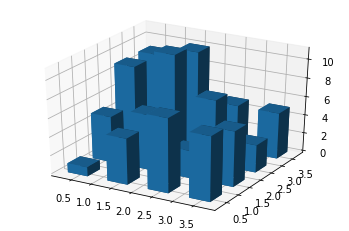

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [53]:
for i in range(256):
    for j in range(256):
        if glcm[i][j] > 0:
            print("i = ", i, " j = ", j, " glcm[i][j] = ", glcm[i][j]) 

i =  0  j =  30  glcm[i][j] =  [[1]]
i =  2  j =  41  glcm[i][j] =  [[1]]
i =  6  j =  23  glcm[i][j] =  [[1]]
i =  7  j =  12  glcm[i][j] =  [[1]]
i =  7  j =  22  glcm[i][j] =  [[1]]
i =  8  j =  24  glcm[i][j] =  [[1]]
i =  9  j =  22  glcm[i][j] =  [[1]]
i =  9  j =  25  glcm[i][j] =  [[2]]
i =  9  j =  26  glcm[i][j] =  [[1]]
i =  9  j =  28  glcm[i][j] =  [[1]]
i =  10  j =  18  glcm[i][j] =  [[1]]
i =  10  j =  22  glcm[i][j] =  [[1]]
i =  10  j =  26  glcm[i][j] =  [[1]]
i =  10  j =  27  glcm[i][j] =  [[1]]
i =  10  j =  34  glcm[i][j] =  [[1]]
i =  11  j =  13  glcm[i][j] =  [[1]]
i =  11  j =  18  glcm[i][j] =  [[1]]
i =  11  j =  20  glcm[i][j] =  [[1]]
i =  11  j =  25  glcm[i][j] =  [[1]]
i =  11  j =  29  glcm[i][j] =  [[1]]
i =  11  j =  30  glcm[i][j] =  [[1]]
i =  11  j =  33  glcm[i][j] =  [[1]]
i =  11  j =  37  glcm[i][j] =  [[1]]
i =  11  j =  44  glcm[i][j] =  [[1]]
i =  12  j =  0  glcm[i][j] =  [[1]]
i =  12  j =  22  glcm[i][j] =  [[1]]
i =  12  j =  23  glcm[

i =  28  j =  13  glcm[i][j] =  [[1]]
i =  28  j =  14  glcm[i][j] =  [[2]]
i =  28  j =  15  glcm[i][j] =  [[2]]
i =  28  j =  16  glcm[i][j] =  [[1]]
i =  28  j =  17  glcm[i][j] =  [[1]]
i =  28  j =  18  glcm[i][j] =  [[2]]
i =  28  j =  19  glcm[i][j] =  [[2]]
i =  28  j =  20  glcm[i][j] =  [[9]]
i =  28  j =  21  glcm[i][j] =  [[5]]
i =  28  j =  22  glcm[i][j] =  [[10]]
i =  28  j =  23  glcm[i][j] =  [[7]]
i =  28  j =  24  glcm[i][j] =  [[13]]
i =  28  j =  25  glcm[i][j] =  [[16]]
i =  28  j =  26  glcm[i][j] =  [[15]]
i =  28  j =  27  glcm[i][j] =  [[25]]
i =  28  j =  28  glcm[i][j] =  [[17]]
i =  28  j =  29  glcm[i][j] =  [[28]]
i =  28  j =  30  glcm[i][j] =  [[26]]
i =  28  j =  31  glcm[i][j] =  [[20]]
i =  28  j =  32  glcm[i][j] =  [[9]]
i =  28  j =  33  glcm[i][j] =  [[6]]
i =  28  j =  34  glcm[i][j] =  [[15]]
i =  28  j =  35  glcm[i][j] =  [[12]]
i =  28  j =  36  glcm[i][j] =  [[12]]
i =  28  j =  37  glcm[i][j] =  [[10]]
i =  28  j =  38  glcm[i][j] =  [[4]]

i =  44  j =  30  glcm[i][j] =  [[2]]
i =  44  j =  31  glcm[i][j] =  [[3]]
i =  44  j =  32  glcm[i][j] =  [[2]]
i =  44  j =  33  glcm[i][j] =  [[4]]
i =  44  j =  34  glcm[i][j] =  [[1]]
i =  44  j =  36  glcm[i][j] =  [[2]]
i =  44  j =  37  glcm[i][j] =  [[4]]
i =  44  j =  39  glcm[i][j] =  [[1]]
i =  44  j =  40  glcm[i][j] =  [[2]]
i =  44  j =  41  glcm[i][j] =  [[1]]
i =  44  j =  42  glcm[i][j] =  [[1]]
i =  44  j =  43  glcm[i][j] =  [[2]]
i =  44  j =  44  glcm[i][j] =  [[1]]
i =  45  j =  25  glcm[i][j] =  [[1]]
i =  45  j =  30  glcm[i][j] =  [[2]]
i =  45  j =  31  glcm[i][j] =  [[3]]
i =  45  j =  32  glcm[i][j] =  [[2]]
i =  45  j =  33  glcm[i][j] =  [[3]]
i =  45  j =  34  glcm[i][j] =  [[2]]
i =  45  j =  36  glcm[i][j] =  [[2]]
i =  45  j =  39  glcm[i][j] =  [[1]]
i =  45  j =  40  glcm[i][j] =  [[2]]
i =  45  j =  42  glcm[i][j] =  [[1]]
i =  45  j =  51  glcm[i][j] =  [[1]]
i =  46  j =  31  glcm[i][j] =  [[1]]
i =  46  j =  33  glcm[i][j] =  [[1]]
i =  46  j =

In [43]:
pd.DataFrame(glcm)

ValueError: Must pass 2-d input

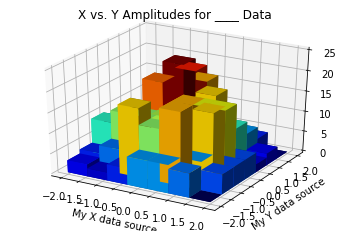

In [33]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from matplotlib import cm
# To generate some test data
x = np.random.randn(500)
y = np.random.randn(500)

XY = np.stack((x,y),axis=-1)

def selection(XY, limitXY=[[-2,+2],[-2,+2]]):
        XY_select = []
        for elt in XY:
            if elt[0] > limitXY[0][0] and elt[0] < limitXY[0][1] and elt[1] > limitXY[1][0] and elt[1] < limitXY[1][1]:
                XY_select.append(elt)

        return np.array(XY_select)

XY_select = selection(XY, limitXY=[[-2,+2],[-2,+2]])


xAmplitudes = np.array(XY_select)[:,0]#your data here
yAmplitudes = np.array(XY_select)[:,1]#your other data here


fig = plt.figure() #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(x, y, bins=(7,7), range = [[-2,+2],[-2,+2]]) # you can change your bins, and the range on which to take data
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])


xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My X data source")
plt.ylabel("My Y data source")
plt.savefig("Your_title_goes_here")
plt.show()